In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import os
import scipy as sci
import utility as util
import random
import math


sinogram=array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 5.,  0.],
       [ 9.,  0.],
       [13.,  0.],
       [15.,  3.],
       [15.,  5.],
       [17.,  7.],
       [17.,  7.],
       [19.,  7.],
       [19.,  5.],
       [19.,  3.],
       [19.,  0.],
       [19.,  0.],
       [17.,  0.],
       [17.,  0.],
       [15.,  0.],
       [15.,  0.],
       [13.,  0.],
       [ 9.,  5.],
       [ 8.,  9.],
       [ 5., 13.],
       [ 7., 15.],
       [ 7., 15.],
       [ 7., 17.],
       [ 5., 17.],
       [ 3., 19.],
       [ 0., 19.],
       [ 0., 19.],
       [ 0., 19.],
       [ 0., 19.],
       [ 0., 17.],
       [ 0., 17.],
       [ 0., 15.],
       [ 0., 15.],
       [ 0., 13.],
       [ 0.,  9.],
       [ 0.,  5.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
   

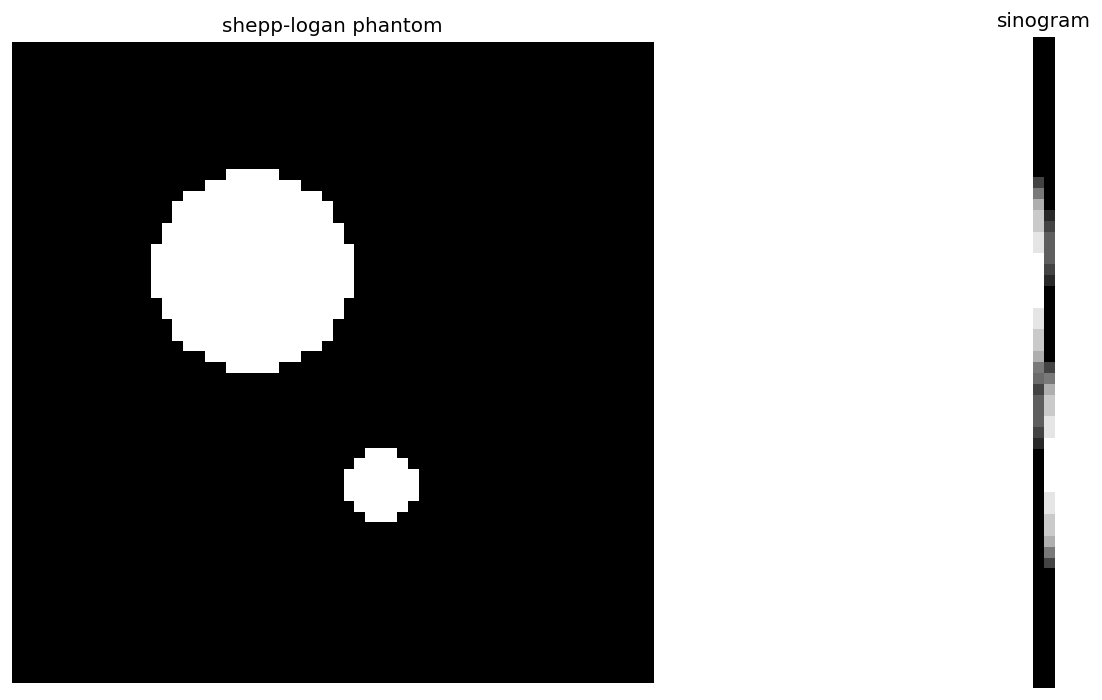

In [4]:
# image = ski.io.imread(os.path.join("data", "8x8 square.jpg"))
image = ski.io.imread(os.path.join("data", "two_circles.png"))
image = image[:,:,:3]
image = ski.color.rgb2gray(image)
image = ski.img_as_float(image)

# image = ski.data.shepp_logan_phantom()
# image = ski.transform.rescale(image, scale=0.2, mode='reflect', channel_axis=None)

# theta = np.linspace(0.0, 180.0, number_of_projections, endpoint=False)
theta = [0.0, 90.0]
sinogram = ski.transform.radon(image, theta=theta, circle=True)
print(f"{sinogram=}")

util.plot_images([image, sinogram], ['shepp-logan phantom', 'sinogram'])

sinogram_fake=array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  5.],
       [ 5.,  9.],
       [ 9., 13.],
       [13., 15.],
       [15., 15.],
       [15., 17.],
       [17., 17.],
       [17., 19.],
       [19., 19.],
       [19., 19.],
       [19., 19.],
       [19., 19.],
       [19., 17.],
       [17., 17.],
       [17., 15.],
       [15., 15.],
       [15., 13.],
       [13.,  9.],
       [ 9.,  5.],
       [ 8.,  0.],
       [ 5.,  0.],
       [ 7.,  0.],
       [ 7.,  0.],
       [ 7.,  0.],
       [ 5.,  0.],
       [ 3.,  0.],
       [ 0.,  3.],
       [ 0.,  5.],
       [ 0.,  7.],
       [ 0.,  7.],
       [ 0.,  7.],
       [ 0.,  5.],
       [ 0.,  3.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]

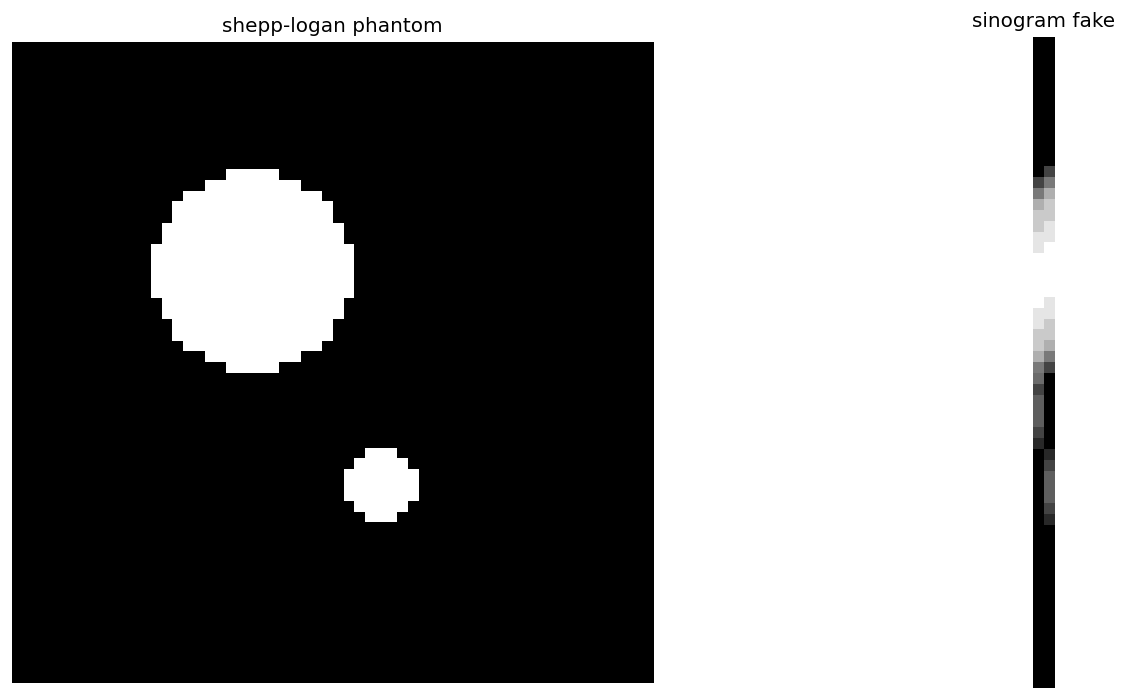

In [5]:
p0 = np.sum(image, axis=0)
p90 = np.sum(image, axis=1)
sinogram_fake = np.stack([p0, p90], 1)

print(f"{sinogram_fake=}")

util.plot_images([image, sinogram_fake], ['shepp-logan phantom', 'sinogram fake'])

In [6]:

print(f"{sinogram=}")
print(f"{sinogram_fake=}")

sinogram=array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 5.,  0.],
       [ 9.,  0.],
       [13.,  0.],
       [15.,  3.],
       [15.,  5.],
       [17.,  7.],
       [17.,  7.],
       [19.,  7.],
       [19.,  5.],
       [19.,  3.],
       [19.,  0.],
       [19.,  0.],
       [17.,  0.],
       [17.,  0.],
       [15.,  0.],
       [15.,  0.],
       [13.,  0.],
       [ 9.,  5.],
       [ 8.,  9.],
       [ 5., 13.],
       [ 7., 15.],
       [ 7., 15.],
       [ 7., 17.],
       [ 5., 17.],
       [ 3., 19.],
       [ 0., 19.],
       [ 0., 19.],
       [ 0., 19.],
       [ 0., 19.],
       [ 0., 17.],
       [ 0., 17.],
       [ 0., 15.],
       [ 0., 15.],
       [ 0., 13.],
       [ 0.,  9.],
       [ 0.,  5.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
   

In [7]:
image_dim = image.shape[0]
image_dim2 = image.shape[0] ** 2 
# assume that image is square


# test that calculation is good

projection_resolution = image_dim

A_90 = np.zeros((image_dim, image_dim2))
ai90 = [] # cosmetic

for i in range(projection_resolution):
    Ai = np.zeros((image_dim, image_dim))
    Ai[i, :] = np.ones((image_dim))
    A_90 [i,:] = Ai.ravel()
    # print(Ai)
    ai90.append(Ai)

# A_90 = A_90.flatten()

A_0 = np.zeros((image_dim, image_dim2))
ai0 = [] # cosmetic

for i in range(projection_resolution):
    Ai = np.zeros((image_dim, image_dim))
    Ai[:, i] = np.ones((image_dim))
    A_0 [i,:] = Ai.ravel()
    ai0.append(Ai)
    # print(Ai)

# A_0 = A_0.flatten()

# show the A matrices in human viewable format
# util.plot_images(ai90, [str(x) + 'A90' for x in range(len(ai90))])
# util.plot_images(ai0, [str(x) + 'A0' for x in range(len(ai90))])

A = np.concat([A_0, A_90], axis=0)

b = sinogram_fake.flatten("F")
x = image.ravel()

res = A@x
# res_viewable = np.stack([res[0:4], res[4:]], axis=1) # cosmetic

cost1 = np.linalg.norm(res - b)

print(f"{image.shape=}")
print(f"{A.shape=}")
print(f"{b.shape=}")
print(f"{x.shape=}")
print(f"{res=} \n {res.shape=}")
print(f"{cost1=}")

image.shape=(60, 60)
A.shape=(120, 3600)
b.shape=(120,)
x.shape=(3600,)
res=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        5.,  9., 13., 15., 15., 17., 17., 19., 19., 19., 19., 19., 17.,
       17., 15., 15., 13.,  9.,  8.,  5.,  7.,  7.,  7.,  5.,  3.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  9., 13., 15., 15., 17.,
       17., 19., 19., 19., 19., 19., 17., 17., 15., 15., 13.,  9.,  5.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  5.,  7.,  7.,  7.,  5.,
        3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.]) 
 res.shape=(120,)
cost1=np.float64(0.0)


In [8]:
# spatial
def _compute_spacial_lut(radius, sigma, print=False):
    x = np.arange(-radius, radius+1)
    X, Y = np.meshgrid(x, x)
    lut = np.exp(-(X**2 + Y**2)/(2*sigma**2))

    if print:
        fig =  plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, lut, cmap='coolwarm')

    return lut



def compute_regularization_term(
    image : np.ndarray,
    sigma : float, # variance of gaussian used
    r     : int, # radius of window used, size of window is 2r+1 x 2r+1
):
    spacial_lut = _compute_spacial_lut(r, sigma)

    N = image.shape[0]
    if image.shape[1] != image.shape[0]:
        raise ValueError("image should be square")
        
    cumulative_error = 0

    for i in range(N):
        for j in range(N):
            left_ind = max(j - r, 0)
            right_ind = min(j + r + 1, N)
            up_ind = max(i - r, 0)
            down_ind = min(i + r + 1, N)

            left_lut = r - (j - left_ind)
            right_lut = left_lut + (right_ind - left_ind)
            up_lut = r - (i - up_ind)
            down_lut = up_lut + (down_ind - up_ind) 

            slice = image[up_ind:down_ind, left_ind:right_ind]
            slice = np.abs(slice - image[i,j])

            lut = spacial_lut[up_lut:down_lut, left_lut:right_lut]
            
            cumulative_error += np.sum(slice * lut)
            
    return cumulative_error


def cost(x, A, sinogram, gamma, sigma, r):
    img_two_d = np.reshape(x, (image_dim, image_dim))
    phi = compute_regularization_term(img_two_d, sigma, r)


    # stack the rows of the sinogram to form matrix b
    # order = 'F' means Fortran style indexing, so column-major
    b = sinogram.flatten(order='F')

    f = np.linalg.norm(A @ x - b) + gamma * phi
    return f

T0=np.float64(737.7974971691302)
alpha=np.float64(0.9977607429692986)


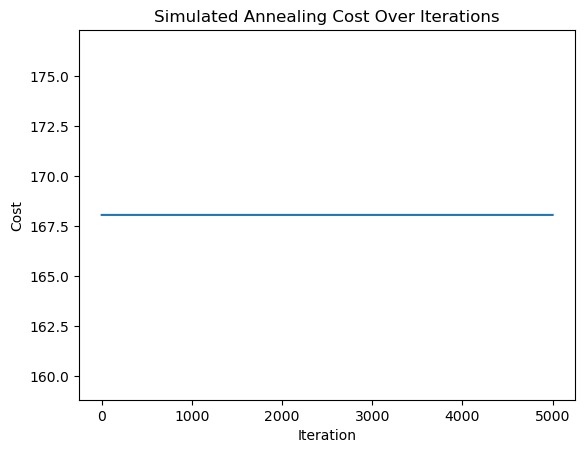

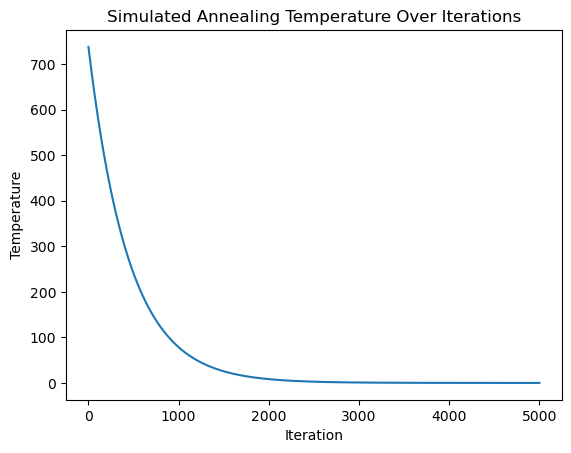

Best solution: [0 0 0 ... 0 0 0]
Fitness: 168.04861292962198


In [15]:
def neighbour(x, i, i_tot, h_min=1, h_max=None):
    """
    Generate a neighbour with Hamming distance h(i) that follows

        h(i) = ((h_min - h_max)/(i_tot-1)) * (i-1) + h_max

    Parameters
    ----------
    x : np.ndarray[int]
        Current binary vector.
    i : int
        Current iteration index (1-based, as on the slide).
    i_tot : int
        Total number of iterations.
    h_min : int, optional
        Minimum Hamming distance at the final iteration.
    h_max : int | None, optional
        Maximum Hamming distance at the first iteration.
        If None, defaults to ⌈0.1·n⌉  (10 % of the variables).

    Returns
    -------
    np.ndarray[int]
        New binary vector differing in h(i) positions.
    """
    n_bits = len(x)
    if h_max is None:
        h_max = max(1, int(np.ceil(0.10 * n_bits)))  # sensible default

    # ----- linear schedule from the slide ----
    h = ((h_min - h_max) / (i_tot - 1)) * (i - 1) + h_max
    h = int(round(h))                               # ensure integer
    h = max(h_min, min(h_max, h))                   # clamp to [h_min, h_max]
    # -----------------------------------------

    flip_idx = np.random.choice(n_bits, size=h, replace=False)
    x_new = x.copy()
    x_new[flip_idx] = 1 - x_new[flip_idx]           # bit-flip

    return x_new

# ---------- 3.  SIMULATED ANNEALING ----------
def simulated_annealing(x0, args=None, T0=10.0, alpha=0.99,
                        max_iter=1000, h_min=1, h_max=None):
    """runs a simulated annealing optimization algorithm

    Parameters
    ----------
    x0 : np.ndarray
        the starting point of the algorithm, n-dimensional array of 1s and 0s, type np.bool
    args : touple, optional
        additional arguments to be passed to the cost function, by default None
    T0 : float, optional
        starting temperature, by default 10.0
    alpha : float, optional
        coefficient of exponential deteoriation of temeperature, by default 0.99
    max_iter : int, optional
        number of iterations after which the algorithm will be stopped, by default 1000
    h_min : int, optional
        minimum hamming distance for new solutions, by default 1
    h_max : int, optional
        maximum hamming distance for new solutions, by default None

    Returns
    -------
    (best_x, best_f)
    best_x : np.ndarray
        solution array, same shape as x0
    best_f : float
        cost function of the solution
    
    The algorithm is implemented sequentially.

    Generated solutions are a calculated Hamming distance away from the current solution.
    Hamming distance is interpolated so that at iteration 0 it is h_max, and on iteration max_iter
    it is h_min.

    The temperature starts at T0 and deteriorates in every iteration as T = T*alpha.
    So at the end the temperature will be T * alpha**(max_iter).
    
    Note that the temperature 


    """                        
    x, f = x0.copy(), cost(x0, *args)
    best_x, best_f = x.copy(), f
    T = T0
    costs = [f]
    temperatures = [T]

    for it in range(1, max_iter + 1):               # 1-based indexing
        x_new = neighbour(x, it, max_iter, h_min, h_max)
        f_new = cost(x_new, *args)
        delta = f_new - f

        # Metropolis criterion
        if delta < 0 or random.random() < (math.exp(-delta / T) if T > 1e-10 else 1):
            x, f = x_new, f_new
            if f < best_f:
                best_x, best_f = x.copy(), f

        costs.append(best_f)
        T *= alpha                                  # geometric cooling
        temperatures.append(T)

    # Plot the costs
    plt.figure()
    plt.plot(costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Simulated Annealing Cost Over Iterations')
    plt.show()

    # Plot the temperature
    plt.figure()
    plt.plot(temperatures)
    plt.xlabel('Iteration')
    plt.ylabel('Temperature')
    plt.title('Simulated Annealing Temperature Over Iterations')
    plt.show()

    return best_x, best_f

def estimate_starting_temperature(n, A, b, gamma, sigma,r):
    costs = []
    for _ in range(n):
        x_rand = np.random.randint(0, 2, size=image_dim2)
        c = cost(x_rand, A, b, gamma, sigma,r)
        costs.append(c)
    return np.mean(costs)


# ---------- 4.  RUN IT ----------
# initial_state = ski.transform.iradon(sinogram_fake, )
# initial_state = ski.transform.iradon_sart()
# initial_state = ski.transform.iradon()
fbp = ski.transform.iradon(sinogram_fake, theta=[0.0, 90.0], output_size=image_dim)
P = np.sum(sinogram_fake[:,0])
# Discretize fbp to 0s and 1s, with exactly P ones at the highest values
fbp_flat = fbp.flatten()
P = int(P)
threshold_indices = np.argpartition(fbp_flat, -P)[-P:]
initial_state = np.zeros_like(fbp_flat, dtype=int)
initial_state[threshold_indices] = 1
initial_state = initial_state.astype(int)

gamma = 0.05
sigma = 1
r = 2
max_iter = 5000

T0 = estimate_starting_temperature(1000, A, b, gamma, sigma, r)
print(f"{T0=}")

alpha = (0.01/T0) ** (1/5000)
print(f"{alpha=}")

best_sol, best_val = simulated_annealing(
    initial_state,
    args=(A, sinogram_fake, gamma, sigma, r),
    max_iter=int(5000),
    h_max=5,
    h_min=1,
    T0=T0,
    alpha=alpha
)
# NOTE: if h_max is changed, T0 or alpha should be changed aswell,
# 

print("Best solution:", best_sol)
print("Fitness:", best_val)


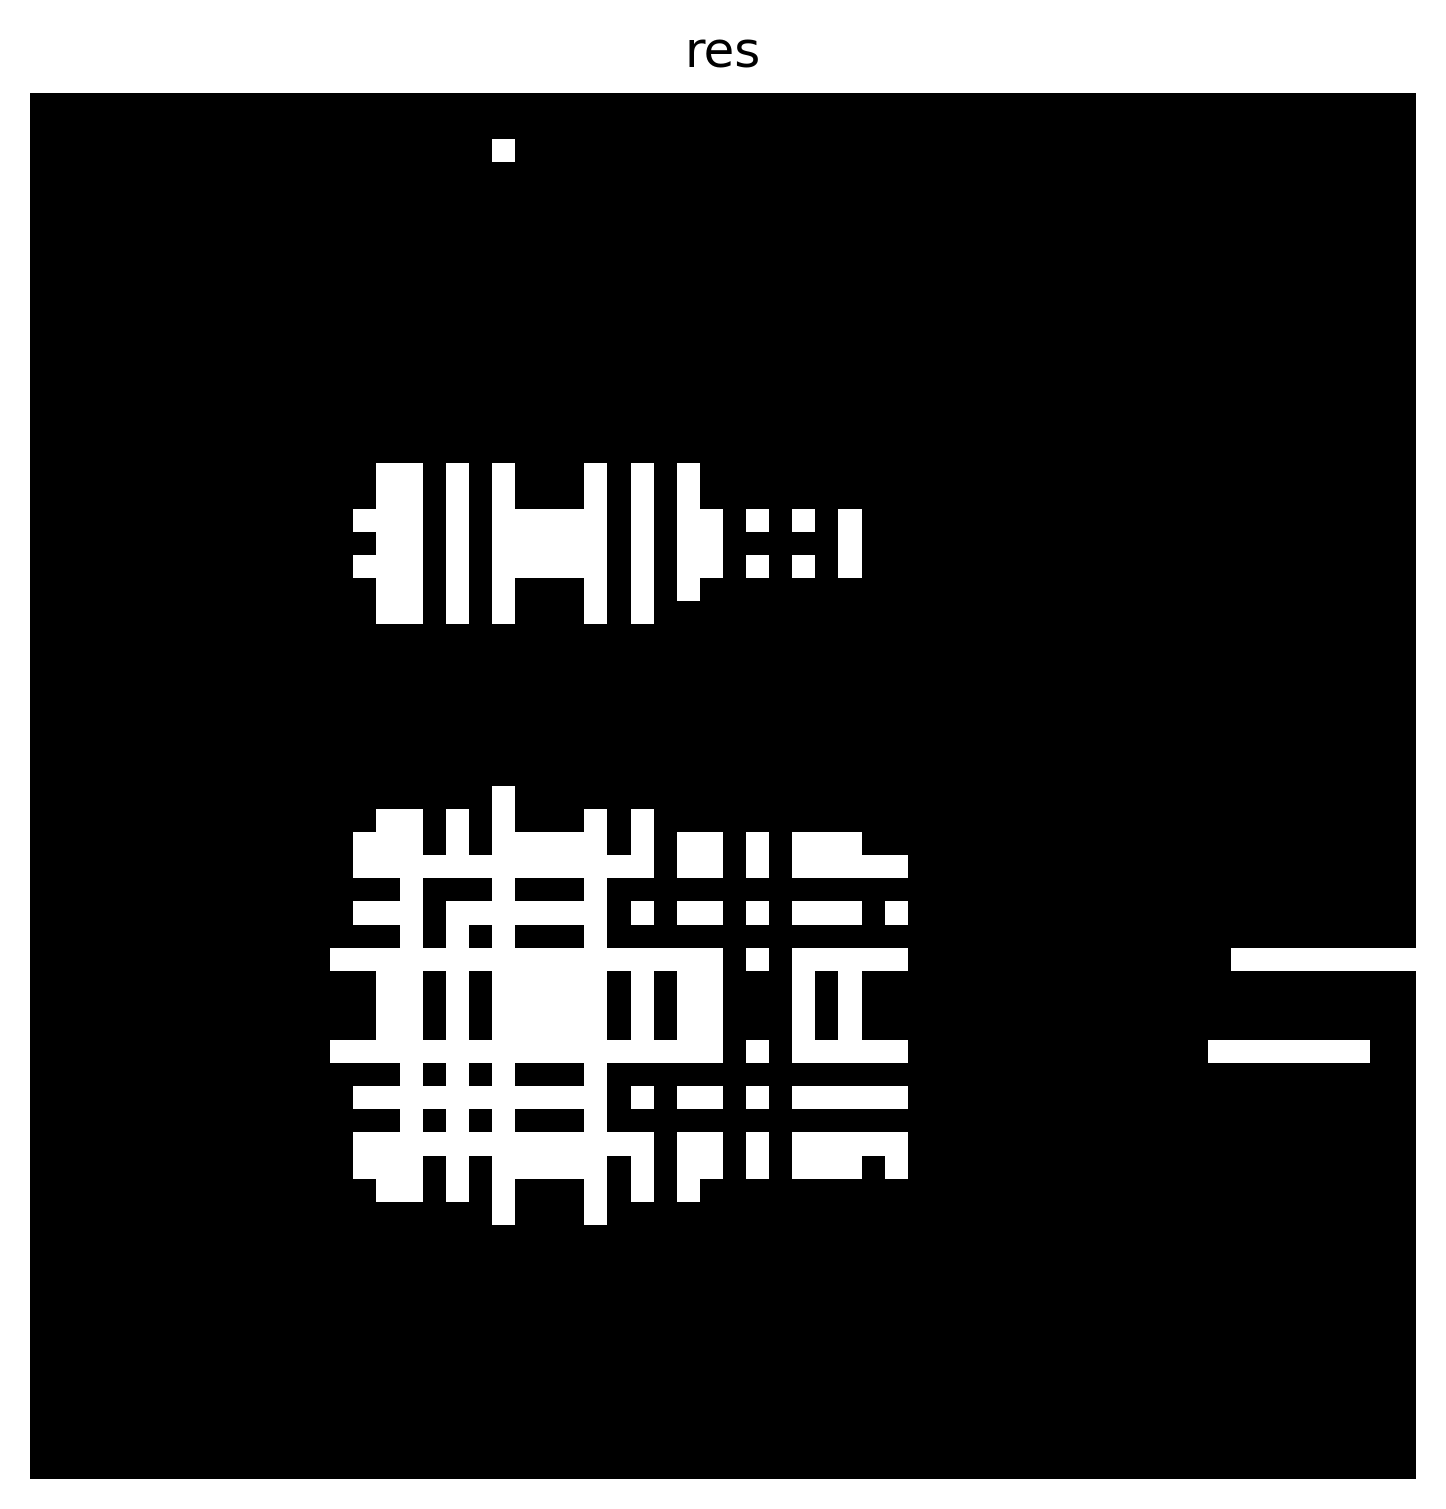

In [16]:
resulting_image = np.reshape(best_sol,(image_dim, image_dim))
util.plot_images([resulting_image], ['res'])

In [11]:
best_possible_cost = cost(image.ravel(), A, sinogram_fake, gamma, sigma, r)
print(best_possible_cost)


3.9033129082140428


In [12]:
ski.io.imsave("resulting_image.jpg", (resulting_image * 255).astype(np.uint8))
np.savetxt("sinogram.csv", sinogram_fake, delimiter=",")
np.savetxt("resulting_image.csv", resulting_image, fmt='%d', delimiter=",")